# Glove, Gensim, me-oh-my

In [40]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

from gensim.test.utils import datapath
from gensim.models import KeyedVectors

In [8]:
# get the data from local storage
# glove_100 = datapath(u"D:\\Conceptual-Analysis\\barlow\\glove.6B\\glove.6B.100d.txt") # windows
glove_100 = datapath(u'/home/max/Desktop/Conceptual Analysis/barlow/glove.6B/glove.6B.100d.txt')  # linux
# we can skip glove2word2vec
# load model
model_100 = KeyedVectors.load_word2vec_format(glove_100, binary=False, no_header=True)
# laptop time: 27.6s  pc time: 41.1s

In [9]:
glove_300 = datapath(u'/home/max/Desktop/Conceptual Analysis/barlow/glove.6B/glove.6B.300d.txt') # linux
# glove_300 = datapath(u"D:\\Conceptual-Analysis\\barlow\\glove.6B\\glove.6B.300d.txt") # windows
model_300 = KeyedVectors.load_word2vec_format(glove_300, binary=False, no_header=True)
# laptop time: 1m 14.2s  pc time: 1m 50.2s

In [10]:
model_100['bachelor']

array([ 0.8322   , -0.14642  , -0.2002   ,  0.32142  ,  0.31173  ,
       -0.030808 ,  0.65621  ,  0.15722  , -0.89315  ,  0.9287   ,
       -0.4073   , -0.012328 ,  0.26558  ,  1.5675   ,  0.54457  ,
       -0.31347  ,  0.57195  ,  0.17359  ,  0.22574  ,  1.0666   ,
       -1.2983   ,  0.2712   ,  0.15471  , -0.92268  ,  0.57024  ,
       -0.068484 ,  0.14368  , -0.94394  ,  0.02954  , -0.92536  ,
       -0.92351  ,  0.97338  , -0.3583   , -0.065045 , -0.51683  ,
        0.44481  , -0.51399  , -0.29038  , -0.59909  ,  0.47418  ,
       -0.41489  , -0.0016607, -0.27886  , -0.31239  , -0.037998 ,
       -0.0026353,  0.30399  ,  0.93702  ,  0.82374  ,  0.24486  ,
       -0.61944  , -0.52649  ,  0.56107  , -0.3573   ,  0.10587  ,
       -0.71975  ,  0.98628  , -0.40722  ,  1.2808   ,  0.063544 ,
        0.12206  ,  0.18842  , -0.82301  , -0.53925  ,  0.42135  ,
        0.01962  ,  0.27123  , -0.21934  ,  0.60616  ,  1.2176   ,
       -1.0249   ,  0.41784  , -0.12338  ,  0.97374  , -0.9841

In [11]:
model_300['bachelor']

array([-0.6253   , -0.1771   ,  0.27251  ,  0.39703  , -0.64292  ,
        0.34638  ,  0.20717  , -0.54641  , -0.067688 ,  0.2473   ,
        0.31673  ,  0.35247  , -0.081559 ,  0.39658  ,  0.79198  ,
        0.52533  ,  0.32633  , -0.26819  ,  0.2159   ,  0.33554  ,
       -0.38797  ,  0.35297  ,  0.21187  ,  0.68271  , -0.80815  ,
        0.74676  ,  0.21105  ,  0.22228  ,  0.079729 , -0.57853  ,
       -0.31118  , -0.41152  ,  0.41781  ,  0.15691  ,  0.0098227,
        0.7202   ,  0.3779   ,  0.086    , -0.1633   ,  0.088281 ,
       -0.15639  ,  0.087224 , -0.22681  ,  0.068579 ,  0.16802  ,
       -0.46802  ,  0.29859  ,  0.36217  ,  0.39329  , -0.85394  ,
       -0.59082  , -0.37417  ,  0.57294  ,  0.41029  ,  0.42961  ,
       -0.33777  ,  0.85083  , -0.71015  ,  0.21539  ,  0.13623  ,
       -0.46485  ,  0.5929   ,  0.34484  ,  0.65869  , -0.25801  ,
       -0.69305  ,  0.5626   , -0.12317  , -0.042026 , -0.24511  ,
       -0.029207 , -0.34903  , -0.1432   , -0.01761  , -0.5315

In [12]:
def definition(word1, word2, size=100, topn=None):
    """
    Return the most similar words to the comination of the word vectors of word1 and word2.
    """
    if size == 100:
        model = model_100
    elif size == 300:
        model = model_300
    else:
        raise ValueError('size must be 100 or 300')
    
    if topn:
        return model.most_similar(positive=[word1, word2], topn=topn)
    else:
        return model.most_similar(positive=[word1, word2])

In [13]:
def calulate_similarity(word1, word2, target, size=100):
    """
    Return the cosine similarity of word1 + word2 (as 'phrase') and target.
    """
    if size == 100:
        model = model_100
    elif size == 300:
        model = model_300
    else:
        raise ValueError('size must be 100 or 300')
    
    # concatenated and reshaped "phrase"
    phrase = ((model[word1] + model[word2]) / 2).reshape(1, -1)
    target_word = model[target].reshape(1, -1)
    return cosine_similarity(phrase, target_word)[0][0]

In [14]:
def display_pca_plot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [word for word in model.vocab]
    
    # get all word vectors into a matrix
    vectors = np.array([model[w] for w in words])

    two_dim = PCA().fit_transform(vectors)[:,:2]

    # plot the points
    plt.scatter(two_dim[:,0], two_dim[:,1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, two_dim):
        plt.text(x+0.05, y+0.05, word)


In [15]:
definition('man', 'unmarried')

[('woman', 0.7986403107643127),
 ('child', 0.7451243996620178),
 ('young', 0.7399294972419739),
 ('mother', 0.7386444807052612),
 ('daughter', 0.7077805399894714),
 ('pregnant', 0.7069243788719177),
 ('husband', 0.7020798921585083),
 ('wife', 0.6987427473068237),
 ('married', 0.6970356702804565),
 ('couple', 0.6967206597328186)]

In [16]:
definition('man', 'unmarried', size=300)

[('woman', 0.6883418560028076),
 ('young', 0.5598209500312805),
 ('person', 0.5512592196464539),
 ('men', 0.5502604842185974),
 ('girl', 0.5314196944236755),
 ('father', 0.5271446704864502),
 ('mother', 0.5231339931488037),
 ('boy', 0.5209730267524719),
 ('husband', 0.5178412795066833),
 ('married', 0.5143395066261292)]

In [17]:
calulate_similarity('man', 'unmarried', 'bachelor', size=300)

0.2396795

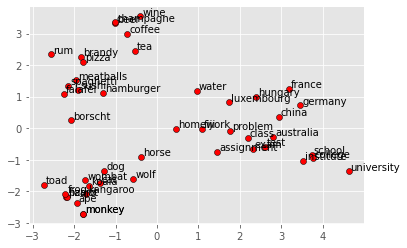

In [18]:
display_pca_plot(model_100, ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                             'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                             'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                             'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                             'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                             'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                             'school', 'college', 'university', 'institute'])


# BERT time! (Where's Ernie??)

In [19]:
# we need a few fresh imports
from transformers import BertTokenizer, BertModel
import torch

In [20]:
# This cell has a warning output that is expected.
model_bert = BertModel.from_pretrained('bert-large-uncased', output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Vocabulary creation

In [7]:
# create vocab
vocab = ['man', 'married', 'unmarried', 'woman', 'female', 'male', 'girls', 'boys', 'girl', 'boy', 'spouse', 'spouses', 
        'sibling', 'siblings', 'offspring', 'offsprings', 'wives', 'wife', 'husband', 'husbands', 'brother', 'brothers',
        'sister', 'sisters', 'daughter', 'daughters', 'child', 'children', 'bachelor', 'bachelors', 'baby', 'small', 
        'little', 'duck', 'duckling', 'cat', 'kitten', 'dog', 'puppy','human','adult','pig','boar','horse','mare','colt',
        'true','belief','knowledge','determinant','scalar','function','matrix','rectangular','table','numbers','relation',
        'two','sets','father','mother','powerset','superset','rationals','irrationals']

In [9]:
# read more from file
# with open('/home/max/Desktop/Conceptual Analysis/barlow/common_words.txt', 'r') as f:
with open('D:\\Conceptual-Analysis\\barlow\\common_words.txt', 'r') as f:
    for line in f:
        vocab.append(line.strip())

vocab = list(np.unique(np.array(vocab)))[1:]

In [10]:
len(vocab)

3880

### Vocab pre-processing
Some words are also combinations of two words to form a short phrase - but I am interested in exclusively single word vocabulary structure. Examples of the second category are more egregious, like 'a couple' or 'wind 2'. The latter may help a human distinguish the single word as referring to the movement of the air, or the possible motion of a snake or ball of yarn. For BERT, though, this will be nonsene without context.

In [11]:
# some words have a space in them as well, which I'd rather consider a phrase
# so I'll just remove those
spaces = [word for word in vocab if ' ' in word]
broken_phrases = set()
for word in spaces:
    for w in word.split(' '):
        try:
            int(w)
        except ValueError:
            broken_phrases.add(w)

In [12]:
# Now, let's whittle it down and polish.

# get vocab list minus no_embed
valid_vocab = [word for word in vocab if word not in spaces]
# I also found some unhelpful words like 'a couple' and 'wind 2' which I don't want to include either
# I'm sure this is a useful distinction for a human with a key to know if it's air or a snake, but
# I want to focus on how BERT understands single words first.
valid_vocab = set(valid_vocab).union(broken_phrases)

# I moved this up here in a hurry, so I'm going to set vocab instead of refactor.
vocab = list(valid_vocab)

Following are a bunch of functions I don't understand, copy-pasted.

This prepares our vocabulary list for BERT 'training'.

In [26]:
def bert_text_preparation(text, tokenizer):
    """Preparing the input for BERT
    
    Takes a string argument and performs
    pre-processing like adding special tokens,
    tokenization, tokens to ids, and tokens to
    segment ids. All tokens are mapped to seg-
    ment id = 1.
    
    Args:
        text (str): Text to be converted
        tokenizer (obj): Tokenizer object
            to convert text into BERT-re-
            adable tokens and ids
        
    Returns:
        list: List of BERT-readable tokens
        obj: Torch tensor with token ids
        obj: Torch tensor segment ids
    
    
    """
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1]*len(indexed_tokens)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    return tokenized_text, tokens_tensor, segments_tensors


def get_bert_embeddings(tokens_tensor, segments_tensors, model):
    """Get embeddings from an embedding model
    
    Args:
        tokens_tensor (obj): Torch tensor size [n_tokens]
            with token ids for each token in text
        segments_tensors (obj): Torch tensor size [n_tokens]
            with segment ids for each token in text
        model (obj): Embedding model to generate embeddings
            from token and segment ids
    
    Returns:
        list: List of list of floats of size
            [n_tokens, n_embedding_dimensions]
            containing embeddings for each token
    
    """

    # Gradient calculation id disabled
    # Model is in inference mode
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors)
        # Removing the first hidden state
        # The first state is the input state
        hidden_states = outputs[2][1:]

    # Getting embeddings from the final BERT layer
    token_embeddings = hidden_states[-1]
    # Collapsing the tensor into 1-dimension
    token_embeddings = torch.squeeze(token_embeddings, dim=0)
    # Converting torchtensors to lists
    list_token_embeddings = [token_embed.tolist()
                             for token_embed in token_embeddings]

    return list_token_embeddings

In [27]:
# Getting embeddings for the target word
target_word_embeddings = []

n = 0
for text in vocab:
    tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(
        text, tokenizer)
    list_token_embeddings = get_bert_embeddings(
        tokens_tensor, segments_tensors, model_bert)

    word_embedding = list_token_embeddings[1]
    if text not in tokenized_text:
        for idx in range(2, len(tokenized_text)-1):
            word_embedding += list_token_embeddings[idx]
        word_embedding = list(np.array(word_embedding)/len(tokenized_text))
        word_embedding = np.array(word_embedding).reshape(-1, 1)
        word_embedding = PCA().fit_transform(word_embedding)
        word_embedding = word_embedding[:n, :]
    elif n == 0:
        n = len(word_embedding)

    target_word_embeddings.append(word_embedding)

model_bert = dict(zip(vocab, target_word_embeddings))
# laptop runtime: 8m 45.2s :(

### Post-filtering vocab
Some words (all beginning in capitals like August or CD) have no vector embedding, or at least one of shape (1, 0), which is unusable. Now that we have all of the embeddings, we need to filter out the ones with unusable embeddings, as a final layer of security.

In [13]:
# These words have no or null embeddings
no_embed = []
for word in vocab:
    if len(model_bert[word]) == 0:
        no_embed.append(word)

no_embed

NameError: name 'model_bert' is not defined

In [29]:
# now we have to filter
valid_vocab = [word for word in vocab if word not in no_embed]

## BERT comparison functions

In [30]:
# cosine similarity between a two word phrase and target word
def calculate_similarity_bert(word1, word2, target):
    phrase = (np.array(model_bert[word1]) + np.array(model_bert[word2])).reshape(1, -1)
    word = np.array(model_bert[target]).reshape(1, -1)
    return cosine_similarity(phrase, word)[0][0]


# cosine similarity between a three word phrase and target word
def calculate_similarity_bert3(word1, word2, word3, target):
    phrase = (np.array(model_bert[word1]) + np.array(model_bert[word2]) + np.array(model_bert[word3])).reshape(1, -1)
    word = np.array(model_bert[target]).reshape(1, -1)
    return cosine_similarity(phrase, word)[0][0]


# cosine distance between two words
def calculate_bert_connect(word1, word2):
    word1 = np.array(model_bert[word1]).reshape(1, -1)
    word2 = np.array(model_bert[word2]).reshape(1, -1)
    return cosine_similarity(word1, word2)[0][0]


def calculate_glove_connect(word1, word2):
    word1 = np.array(model_300[word1]).reshape(1, -1)
    word2 = np.array(model_300[word2]).reshape(1, -1)
    return cosine_similarity(word1, word2)[0][0]

In [31]:
calculate_similarity_bert('man', 'unmarried', 'bachelor')

0.7415243547513813

In [32]:
calculate_bert_connect('unmarried', 'bachelor')

0.7438659515741233

In [33]:
calculate_similarity_bert3('morning', 'afternoon', 'evening', 'day')

0.7468087523267504

## Phrase similarity

In [34]:
def positive(words):
    """
    Given a list of words, return the list as a flattened and concatenated NumPy array of their BERT embeddings.
    I think this function "phrasifies" the list of words.
    words: list[str]
    """
    print(words)
    res = np.array(model_bert[words[0]]).reshape(1, -1)
    for x in words[1:]:
        res += np.array(model_bert[x]).reshape(1, -1)
    return res


def most_similar(word, phrase=False):
    """
    Return the 10 most similar words to a given word based on BERT embeddings
    word: string
    """
    similarities = {}
    word1 = word
    if not phrase:
        word1 = np.array(model_bert[word]).reshape(1, -1)
    for term in vocab:
        word2 = np.array(model_bert[term]).reshape(1, -1)
        if isinstance(word, str):
            if term != word:
                similarities[term] = cosine_similarity(word1, word2)
        elif word2.any():
            similarities[term] = cosine_similarity(word1, word2)
    return list({k: v for k, v in sorted(similarities.items(), key=lambda item: item[1], reverse=True)}.items())[2:12]


In [29]:
w1 = 'married'
w2 = 'man'
# becomes like 'unmarried man', but represented as ndarray
most_similar(positive([w1, w2]), phrase=True)

['married', 'man']


[('husband', array([[0.85834757]])),
 ('horse', array([[0.84829096]])),
 ('cake', array([[0.84059127]])),
 ('divorced', array([[0.83847056]])),
 ('train', array([[0.83816104]])),
 ('living', array([[0.83794272]])),
 ('job', array([[0.83428702]])),
 ('smoking', array([[0.83335487]])),
 ('romantic', array([[0.83332636]])),
 ('kid', array([[0.832829]]))]

In [32]:
# I want to map each word to words within some threshold, rather than a specific amount of words
big_guy = {}
threshold = 0.8
for key in valid_vocab:
    big_guy[key] = []
    for word in valid_vocab:
        if key == word:
            continue
        sim_score = calculate_bert_connect(key, word)
        if sim_score > threshold:
            big_guy[key].append((word, sim_score))
    big_guy[key].sort(key=lambda x: x[1], reverse=True)

# pc runtime: going to bed at 37.. ran all night, 616m 40.2s (10.2h), ran out of space too.
# day2: 76m 58.3s

In [36]:
max(big_guy, key=lambda x: len(big_guy[x]))

'soup'

In [53]:
calculate_glove_connect('man', 'horse')

0.3307441

In [37]:
# vector of king, minus vector of man, plus vector of woman, compared via cosine similarity to vector of queen
out = []
for model in [model_bert, model_100, model_300]:
    out.append(cosine_similarity(((np.asarray(model['king']) - np.asarray(model['man']) / 2) + np.asarray(model['woman'])).reshape(1, -1), np.asarray(model['queen']).reshape(1, -1))[0][0])

out

[0.5240732386227218, 0.7994436, 0.7009233]

In [ ]:
big_guy['soup']

### NetworkX viz test
How can we make wordmaps?

In [30]:
import networkx as nx      # in conda!

In [4]:
words = ['man', 'married', 'unmarried', 'woman', 'female', 'male', 'girls', 'boys', 'girl', 'boy', 'spouse', 'spouses', 
        'sibling', 'siblings', 'offspring', 'offsprings', 'wives', 'wife', 'husband', 'husbands', 'brother', 'brothers',
        'sister', 'sisters', 'daughter', 'daughters', 'child', 'children', 'bachelor', 'bachelors', 'baby', 'small', 
        'little', 'duck', 'duckling', 'cat', 'kitten', 'dog', 'puppy','human','adult','pig','boar','horse','mare','colt',
        'true','belief','knowledge','determinant','scalar','function','matrix','rectangular','table','numbers','relation',
        'two','sets','father','mother','powerset','superset','rationals','irrationals']

In [32]:
# now, I'm going to use words to make an edge list, where weight is the distance in BERT embeddings
edges = []
threshold = 0.6 # I'm going lower for the smaller vocab
for u in words:
    for v in words:
        if u == v:
            continue
        sim_score = calculate_bert_connect(u, v)
        if sim_score > threshold:
            edges.append((u, v, sim_score))

In [33]:
# now I will build the graph from the edge list in networkx
G = nx.Graph()
G.add_weighted_edges_from(edges)

In [37]:
# now, I want to draw the graph using matplotlib
pos = nx.circular_layout(G)
edgewidth = [G.get_edge_data(u, v)['weight'] * 3 for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, width=edgewidth, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.savefig('graph.png')

Error in callback <function flush_figures at 0x000001EB63B70430> (for post_execute):


In [39]:
calculate_glove_connect('clothes', 'closet')

0.40506247

### GPT-3 Embeddings
How can we repeat this experiment with a new model, like GPT-3 Ada or Babbage (DaVinci may be too big).
Goals:
* Create `model_ada`, like `model_bert` where we ask the GPT-3 API to serve us some word embedding, and then we save it.
    * (optional) Save GPT-3 embeddings to a file, so we don't have to make costly requests more than once
* Re-run meaning tests and cosine similarity of relevant terms and phrases using new embeddings
* Implement above_zero_complexity for new model

In [2]:
import os
import openai
import numpy as np

# this is set in my conda env 'aca'
# by `conda env config vars set OPENAI_API_KEY="my-key"`
openai.api_key = os.getenv('OPENAI_API_KEY')

In [38]:
# this will be my function for getting embeddings
gpt_models = ['text-similarity-ada-001',
              'text-similarity-babbage-001',
              'text-similarity-curie-001',
              'text-similarity-davinci-001']

def get_embedding(text, engine='text-similarity-ada-001'):
    text = text.replace('\n', ' ')
    return openai.Embedding.create(input=[text], engine=engine)['data'][0]['embedding']

In [5]:
np.asarray(get_embedding('king', engine=gpt_models[0])).reshape(1, -1)

array([[-0.00247947,  0.01203689,  0.01060026, ...,  0.05212906,
         0.02698807,  0.01124674]])

I used a script version of get_embedding usage to save vocab embeddings from Ada, I'll load them in from a file.

In [4]:
ada_embeds = []
with open(u'/gpfs/fs1/home/mbarlow6/Desktop/Conceptual-Analysis/barlow/gpt/gpt_ada.txt', 'r') as f:
    for line in f:
        ada_embeds.append([float(x) for x in line.strip().split()])

vocab = []
with open(u'/gpfs/fs1/home/mbarlow6/Desktop/Conceptual-Analysis/barlow/valid_vocab.txt', 'r') as f:
    for w in f:
        vocab.append(w.strip())


model_ada = dict(zip(vocab, ada_embeds))

In [18]:
# where are the outer edges of our data? let's preserve 20% from each edge.

top = np.quantile(list(model_ada.values()), 0.966)  # top 3.4%
bot = np.quantile(list(model_ada.values()), 0.033)  # bottom 3.3%
print(bot, top)

-0.051756596509367224 0.051424112379550926


### Complexity tests
Now that I have some GPT-3 embeddings to compare with, I'm going to bring in some measures of complexity previously cited.

In [23]:
m, mm = 0, 0
for w in model_ada.values():
    for val in w:
        m = max(m, float(val))
        mm = min(mm, float(val))

print(m)
print(mm)

0.18146279454231262
-0.3554960787296295


In [5]:
def sum_complexity(word):
    """
    Sums the absolute value of each dimension in a word's embedding vector (in GPT-3 Ada)
    args:
        word: str -> word to get embedding for
    returns:
        sum of absolute value of each dimension in embedding vector
    """
    return sum([abs(float(x)) for x in model_ada[word]])


def above_zero_complexity(word, threshold=0.021):
    # Trying to extract the most "important" features
    # default threshold is 0.021, which contains 40% of data points (across the whole model)
    em = model_ada[word]
    return len([abs(float(x)) for x in em if abs(float(x)) > threshold])/len(em)

I now expect ~7.7% of the data to be preserved (0.077) as my threshold captures the top 3.4% and the bottom 3.3% of data points by value

So, I will compare my 'complexity' to that, and maybe will find some difference in the distance from the expected amount of preserved data

In [37]:
test_words = ['king', 'man', 'duck', 'baby', 'duckling', 'entertaining', 'government',
                'Friday', 'traditional', 'uncontrolled', 'regulation']


for w in test_words:
    print("-----")
    print(w)
    print(f"0.05: {above_zero_complexity(w, 0.05)} adj: {(above_zero_complexity(w, 0.05) - 0.077) * 100}")
    print(f"0.021: {above_zero_complexity(w, 0.021)} adj: {(above_zero_complexity(w, 0.021) - 0.445) * 100}")
    print(f"sum: {(sum_complexity(w) - 23) * 10}")

-----
king
0.05: 0.078125 adj: 0.1125000000000001
0.021: 0.4501953125 adj: 0.5195312499999993
sum: 5.751518655415566
-----
man
0.05: 0.0869140625 adj: 0.99140625
0.021: 0.4462890625 adj: 0.12890624999999933
sum: 4.461389857169706
-----
duck
0.05: 0.0771484375 adj: 0.0148437500000001
0.021: 0.4287109375 adj: -1.6289062500000007
sum: 6.550136826190283
-----
baby
0.05: 0.076171875 adj: -0.0828124999999999
0.021: 0.4443359375 adj: -0.06640625000000067
sum: 6.872079981403658
-----
duckling
0.05: 0.0771484375 adj: 0.0148437500000001
0.021: 0.4326171875 adj: -1.2382812500000007
sum: 6.349478021111281
-----
entertaining
0.05: 0.0625 adj: -1.45
0.021: 0.4501953125 adj: 0.5195312499999993
sum: 2.9206471496945596
-----
government
0.05: 0.0712890625 adj: -0.57109375
0.021: 0.458984375 adj: 1.3984374999999993
sum: 4.509202418230416
-----
Friday
0.05: 0.0732421875 adj: -0.3757812499999999
0.021: 0.4541015625 adj: 0.9101562499999993
sum: 2.8502212209423305
-----
traditional
0.05: 0.0693359375 adj: -0

These are giving me a headache... It seems like the threshold I choose is statistical, not meaningful. (Are they the same in a model?) Each threshold I choose leaves VERY little space in variation of 'above zero complexity' - when I choose based on quartile all terms score about 0.4. As that term moves closer to 1, we include less and less points, and the complexity scores move with the percentage of data that is being preserved. Bottom 20% of numbers are below -0.0218967255204916, and top 20% are above 0.024340828508138665, so something like threshold 0.021 captures 40% of the data, nearly every time, no matter the word. This doesn't feel conducive to our goal.

In [51]:
wh = get_embedding('white house')
bd = get_embedding('baby duck')
um = get_embedding('unmarried man')

hw = get_embedding('Hello, world! It is I, the bachelor duckling, come to lay seige to the White House.')

complaint = get_embedding("These are giving me a headache... It seems like the threshold I choose is statistical, not meaningful. (Are they the same in a model?) Each threshold I choose leaves VERY little space in variation of 'above zero complexity' - when I choose based on quartile all terms score about 0.4. As that term moves closer to 1, we include less and less points, and the complexity scores move with the percentage of data that is being preserved. Bottom 20\% \of numbers are below -0.0218967255204916, and top 20% are above 0.024340828508138665, so something like threshold 0.021 captures 40\% \of the data, nearly every time, no matter the word. This doesn't feel conducive to our goal.")

In [55]:
len([abs(float(x)) for x in complaint if abs(float(x)) > 0.05])/len(complaint)

0.0615234375

In [58]:
sum([abs(float(x)) for x in complaint])

22.717633825312078

In [59]:
phrases = [wh, bd, um, hw, complaint]

In [72]:
def most_similar(word, phrase=False):
    # if phrase, expecting embedding
    similarities = {}
    word1 = word
    if not phrase:
        word1 = np.asarray(model_ada[word]).reshape(1, -1)
    else:
        word1 = np.asarray(word1).reshape(1, -1)
    for term in vocab:
        word2 = np.asarray(model_ada[term]).reshape(1, -1)
        if isinstance(word, str):
            if term != word:
                similarities[term] = cosine_similarity(word1, word2)
        elif word2.any():
            similarities[term] = cosine_similarity(word1, word2)

    return list({k: v for k, v in sorted(similarities.items(), key=lambda item: item[1], reverse=True)}.items())[:12]

In [73]:
print("white house")
print(most_similar(wh, True))
print("baby duck")
print(most_similar(bd, True))
print("unmarried man")
print(most_similar(um, True))
print("Hello, world! It is I, the bachelor duckling, come to lay seige to the White House.")
print(most_similar(hw, True))
print("Rant from above:")
print(most_similar(complaint, True))
print('man')
print(most_similar('man'))

white house
[('white', array([[0.92866519]])), ('president', array([[0.91644013]])), ('palace', array([[0.87985856]])), ('house', array([[0.87959042]])), ('politics', array([[0.87511269]])), ('government', array([[0.87485086]])), ('senator', array([[0.8729199]])), ('politician', array([[0.87277912]])), ('household', array([[0.87031118]])), ('politically', array([[0.86951285]])), ('executive', array([[0.86944558]])), ('congress', array([[0.86845826]]))]
baby duck
[('duckling', array([[0.93903434]])), ('baby', array([[0.92644236]])), ('duck', array([[0.90906323]])), ('puppy', array([[0.87660101]])), ('child', array([[0.87258577]])), ('offspring', array([[0.86769641]])), ('children', array([[0.86710025]])), ('birth', array([[0.86388197]])), ('chicken', array([[0.86152264]])), ('pregnant', array([[0.86036832]])), ('kitten', array([[0.85628729]])), ('feather', array([[0.8552504]]))]
unmarried man
[('unmarried', array([[0.95856518]])), ('husband', array([[0.90412195]])), ('unemployed', array

In [69]:
cosine_similarity(np.array(model_ada['horse']).reshape(1, -1), np.array(model_ada['man']).reshape(1, -1))

array([[0.85223754]])